In [49]:
#Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#define figure size
sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4


# Training set and Testing Set 
from sklearn.model_selection import train_test_split
# Import Training Model
from sklearn.linear_model import LinearRegression

In [3]:
#import data 

df=pd.read_csv('USA_Housing.csv')
df.shape

(5000, 7)

In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
df.sample(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2254,75595.702067,5.011921,6.689794,3.40,30177.117965,1.113857e+06,"61875 Sheila Branch Apt. 296\nStephanieshire, ..."
2472,59278.945890,5.945139,8.847869,3.16,12351.719603,1.015011e+06,"47608 Becky Shores Apt. 271\nFernandezshire, A..."
531,67972.630085,5.496668,6.337286,3.22,27865.330786,9.112022e+05,"8689 Nathan Cape Suite 323\nDavidshire, AR 24822"
85,64721.564496,5.677638,6.971332,4.48,36115.816364,1.063423e+06,"042 Mitchell Mountains\nAdamsview, OR 44424"
1871,89157.612925,6.286087,7.192238,4.46,33834.921726,1.643292e+06,"394 Brown Landing Suite 941\nLake Maria, ME 97..."
1885,56324.623011,6.353594,6.716501,4.02,41354.435987,1.269811e+06,"4364 Gonzalez Row Apt. 406\nBryanton, ND 71386"
1286,80939.634573,6.334546,7.647145,3.31,27771.544505,1.499921e+06,"7084 Turner Crossing Suite 917\nNew Mary, AL 1..."
1209,60007.135804,7.397699,6.119938,4.02,47734.407064,1.281778e+06,"8611 Swanson Lodge Apt. 186\nConwaymouth, RI 3..."
727,69200.664269,5.609022,6.571302,4.28,31085.323040,1.150094e+06,"976 Tamara Course Suite 169\nSouth Donna, MP 2..."
4129,77701.054052,7.804094,9.287086,6.39,49495.064963,2.187326e+06,"1930 Walker Ways Suite 288\nLake Dianamouth, M..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

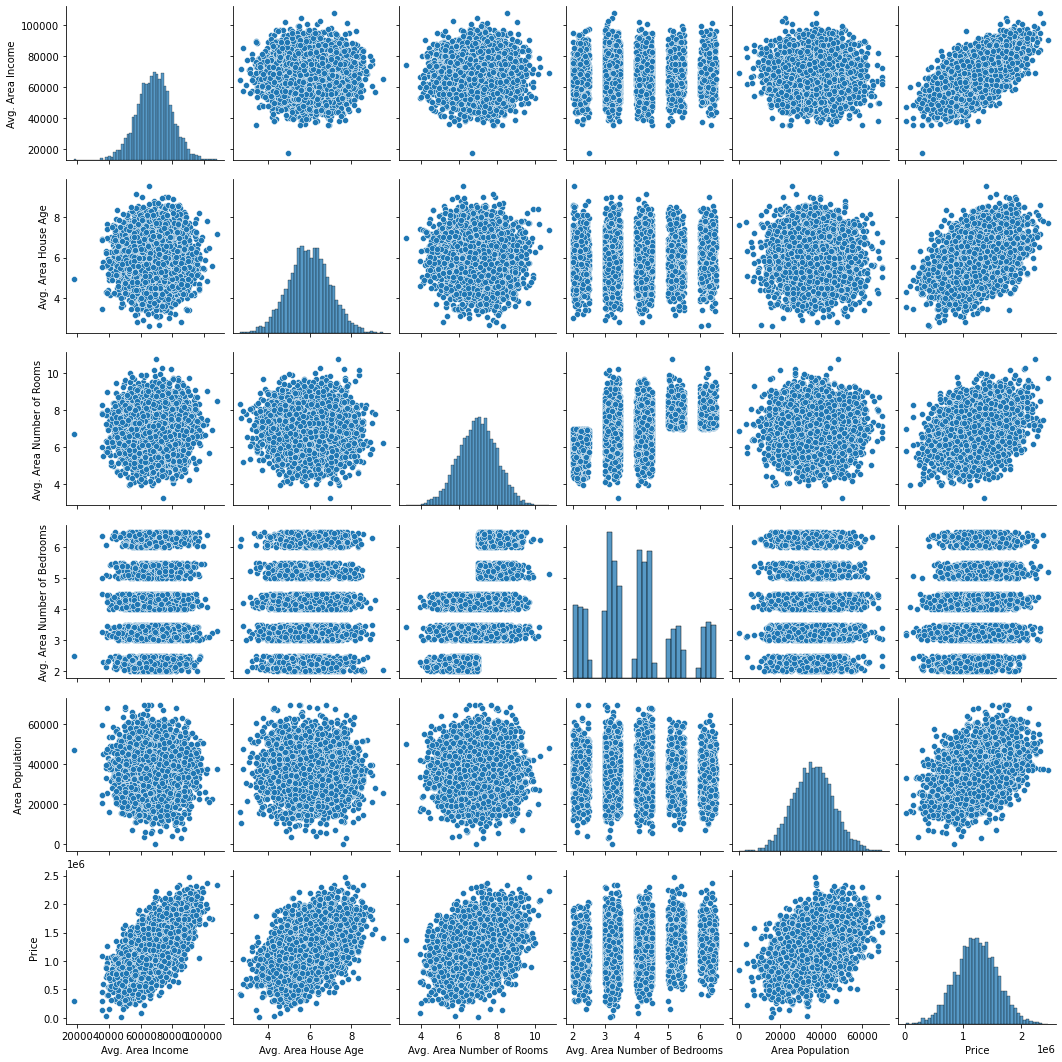

In [12]:
#simple plots

sns.pairplot(df)

<AxesSubplot:xlabel='Price', ylabel='Count'>

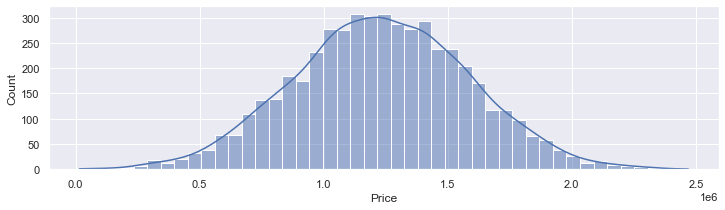

In [29]:
plt.figure(figsize=(12,3))
sns.histplot(df['Price'], kde=True)

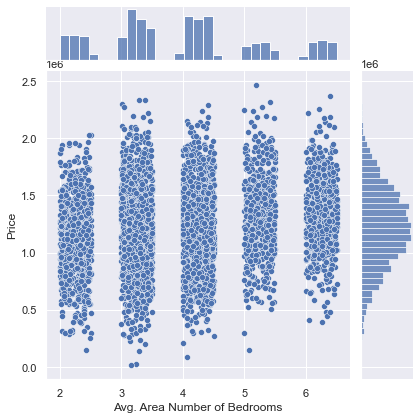

In [28]:

sns.jointplot(x='Avg. Area Number of Bedrooms',y='Price',data=df,palette='rainbow')

In [32]:
df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

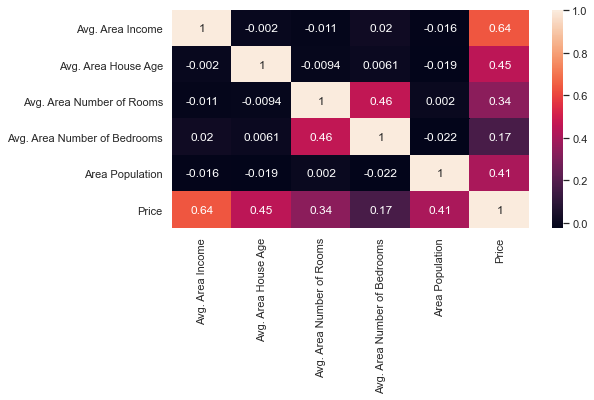

In [34]:
sns.heatmap(df.corr(), annot=True)

In [35]:
#import ML packages


df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [36]:
# Build Freatures Columns 
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [39]:
y = df['Price']
y.describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [47]:
X_train.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,68409.089762,5.972688,6.985338,3.971693,36132.694965
std,10574.995196,0.974279,0.995905,1.232236,9983.395487
min,35454.714659,2.797619,3.950225,2.000000,3285.450538
25%,61286.609359,5.307253,6.308615,3.140000,29381.337239
50%,68724.574389,5.965352,6.997714,4.020000,36223.738866
75%,75488.224448,6.614806,7.659290,4.490000,42697.695605
max,107701.748378,9.519088,10.759588,6.500000,69621.713378


In [48]:
X_test.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,68844.137817,5.984024,6.991473,3.995785,36209.747649
std,10778.673637,1.016886,1.020784,1.237152,9840.705237
min,17796.631190,2.644304,3.236194,2.000000,172.610686
25%,61651.312076,5.339013,6.288420,3.150000,29482.151765
50%,68893.439532,5.980620,7.013326,4.080000,36105.719234
75%,76128.177140,6.688164,7.670842,4.490000,43091.819550
max,101144.323930,9.125283,10.219902,6.500000,69592.040236


In [45]:
y_train.describe()

count    3.500000e+03
mean     1.232403e+06
std      3.518067e+05
min      1.593866e+04
25%      9.986407e+05
50%      1.232983e+06
75%      1.472388e+06
max      2.469066e+06
Name: Price, dtype: float64

In [52]:
#init model 


lm = LinearRegression()
type(lm)

sklearn.linear_model._base.LinearRegression

In [58]:
# train and fit my model 
lm.fit(X_train, y_train)

<bound method LinearRegression.fit of LinearRegression()>

In [59]:
lm.intercept_

-2640159.79685191

In [60]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [64]:
#create a simiple DataFrame to visualize 

cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=["CoEff"])

In [65]:
cdf

,CoEff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [70]:
from sklearn.datasets import load_boston
boston = load_boston()
#boston

In [72]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<AxesSubplot:>

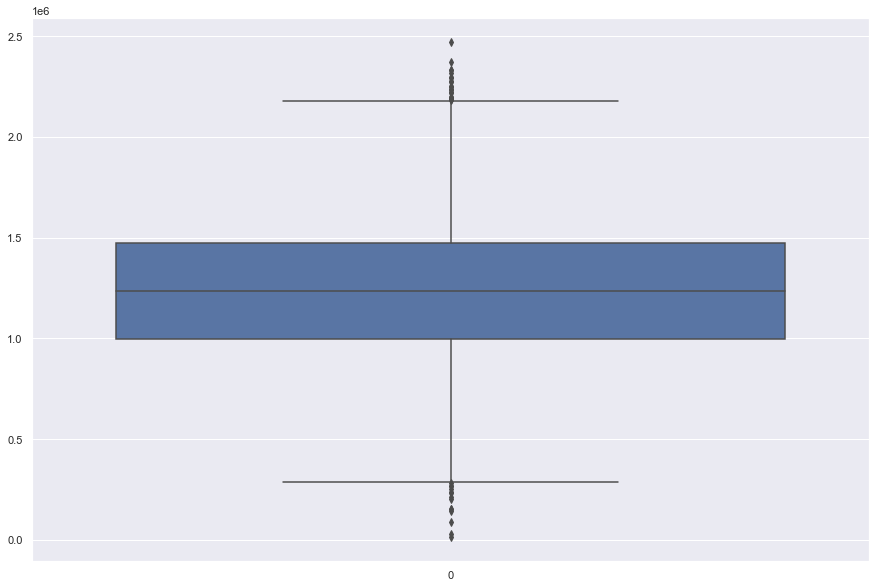

In [77]:
sns.set(rc={"figure.figsize":(15, 10)}) #width=6, height=5

#display scatterplot
sns.boxplot(data=df["Price"])

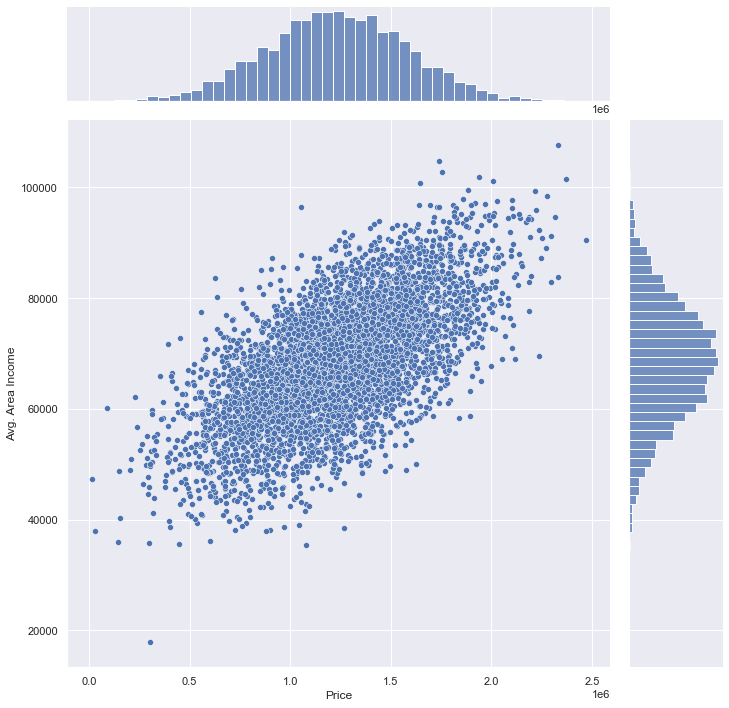

In [81]:
sns.jointplot(data=df, x="Price", y="Avg. Area Income", height=10)

In [82]:
# get predictions 


predictions = lm.predict(X_test)

In [83]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

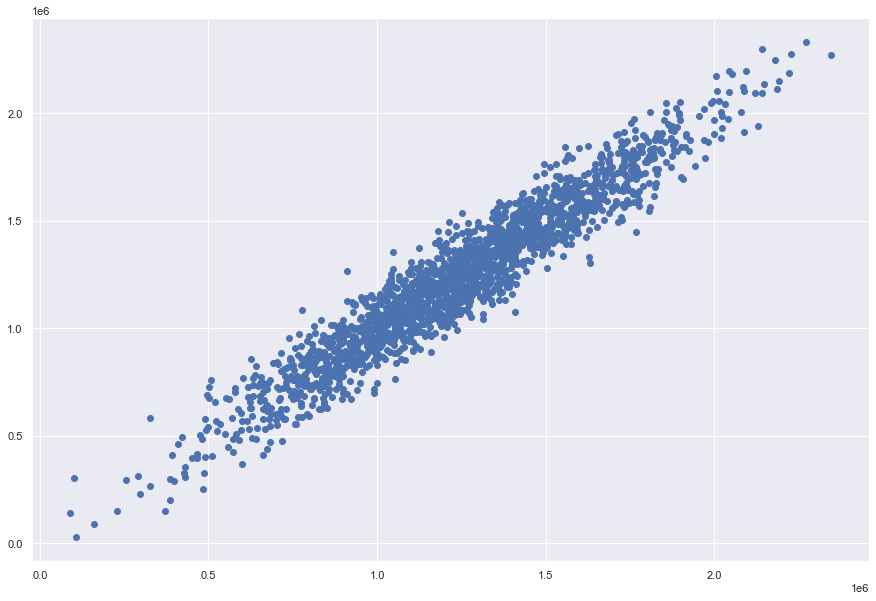

In [92]:
#check prdictions and y_test in scater plot 


plt.scatter(predictions, y_test)
#this fig is good model

<AxesSubplot:xlabel='Price', ylabel='Count'>

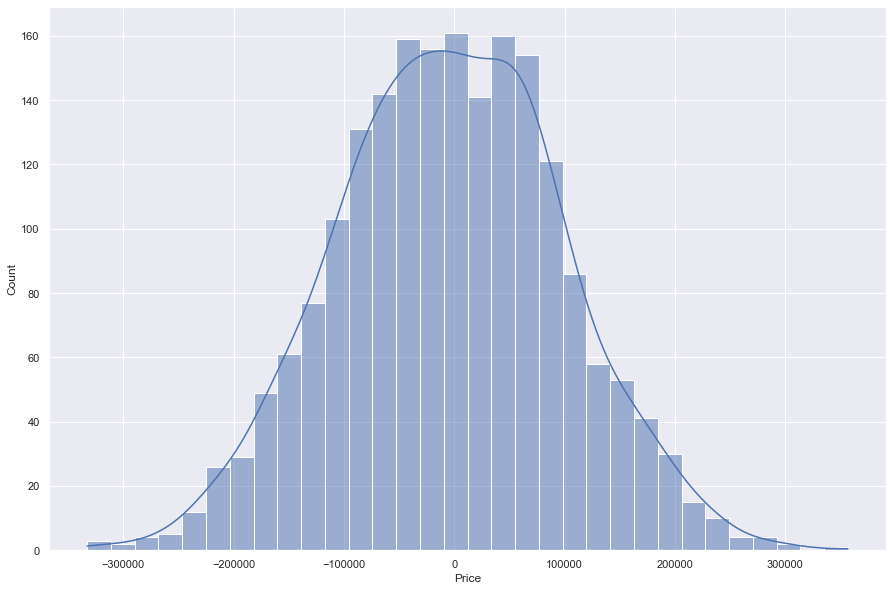

In [91]:
sns.histplot((y_test-predictions), kde=True)
#this fig is good model

In [93]:
# Calculate Metrics 

from sklearn import metrics

#mean_absolute_error
metrics.mean_absolute_error(y_test, predictions)


82288.22251914954

In [98]:
#mean_absolute_percentage_error
metrics.mean_absolute_percentage_error(predictions,y_test)

0.07497208677509283

In [99]:
#mean_squared_error
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [101]:
 #Root mean_squared_error
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153